código para definir y manipular redes bayesianas (Directed Acyclic Graphs)
usamos el mismo ambiente para instalar bayespy

In [2]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Definir la estructura del grafo (DAG)
model = DiscreteBayesianNetwork([
    ('I', 'S'),   # I -> S
    ('I', 'G'),   # I -> G
    ('D', 'G'),   # D -> G
    ('G', 'L')    # G -> L
])

# Luego defines las CPDs igual que antes
cpd_I = TabularCPD(variable='I', variable_card=2, values=[[0.7], [0.3]])
cpd_S = TabularCPD(variable='S', variable_card=2,
                   values=[[0.9, 0.4],
                           [0.1, 0.6]],
                   evidence=['I'],
                   evidence_card=[2])
cpd_D = TabularCPD(variable='D', variable_card=2, values=[[0.6], [0.4]])
cpd_G = TabularCPD(variable='G', variable_card=2,
                   values=[
                       [0.95, 0.8, 0.7, 0.1],
                       [0.05, 0.2, 0.3, 0.9]
                   ],
                   evidence=['I', 'D'],
                   evidence_card=[2, 2])
cpd_L = TabularCPD(variable='L', variable_card=2,
                   values=[[0.8, 0.3],
                           [0.2, 0.7]],
                   evidence=['G'],
                   evidence_card=[2])

model.add_cpds(cpd_I, cpd_S, cpd_D, cpd_G, cpd_L)

assert model.check_model()

infer = VariableElimination(model)

# Ejemplo de consulta
result = infer.query(variables=['L'], evidence={'I': 1, 'D': 0})
print(result)


+------+----------+
| L    |   phi(L) |
+======+==========+
| L(0) |   0.6500 |
+------+----------+
| L(1) |   0.3500 |
+------+----------+


In [2]:
#verificación de widget

import ipywidgets as widgets
widgets.IntSlider()


IntSlider(value=0)

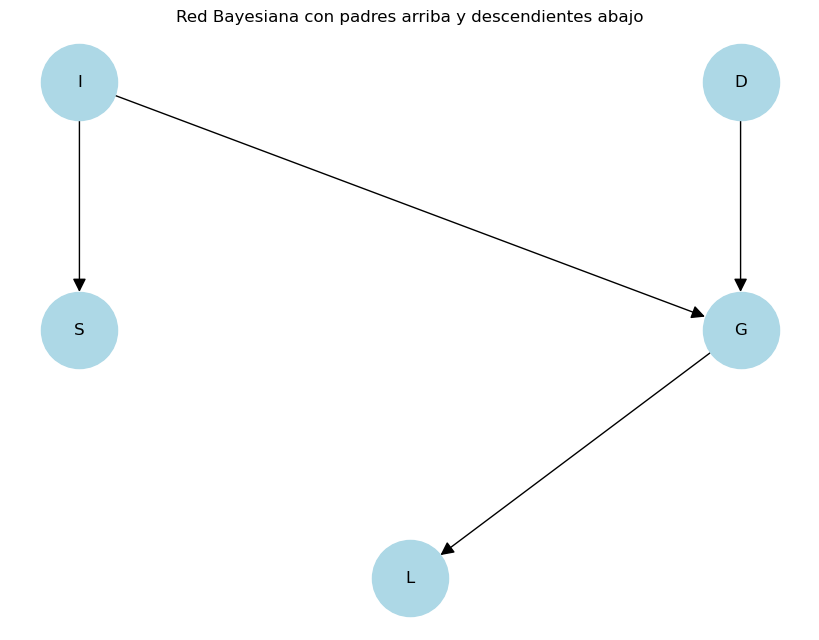

Dropdown(description='Nodo:', options=('I', 'S', 'D', 'G', 'L'), value='I')

Output()

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ipywidgets as widgets
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD


# Graficar la red bayesiana con padres arriba y descendientes abajo
# Crear grafo dirigido con NetworkX
G = nx.DiGraph()
G.add_edges_from(model.edges())

# Calcular niveles para jerarquía padres arriba
levels = {}
for node in nx.topological_sort(G):
    parents = list(G.predecessors(node))
    if not parents:
        levels[node] = 0
    else:
        levels[node] = max(levels[p] for p in parents) + 1

# Agrupar nodos por nivel
level_nodes = {}
for node, level in levels.items():
    level_nodes.setdefault(level, []).append(node)

# Asignar posiciones para graficar (padres arriba)
pos = {}
max_level = max(levels.values())
for level, nodes in level_nodes.items():
    y = max_level - level  # invertir eje Y para que nivel 0 quede arriba
    x_spacing = 1 / (len(nodes) + 1)
    for i, node in enumerate(nodes, start=1):
        x = i * x_spacing
        pos[node] = (x, y)

# Dibujar el grafo
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', arrowsize=20)
plt.title("Red Bayesiana con padres arriba y descendientes abajo")
plt.axis('off')
plt.show()

# Crear dropdown para seleccionar nodo y mostrar CPD
dropdown = widgets.Dropdown(
    options=[cpd.variable for cpd in model.get_cpds()],
    description='Nodo:',
    disabled=False,
)

output = widgets.Output()

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        output.clear_output()
        selected = change['new']
        for cpd in model.get_cpds():
            if cpd.variable == selected:
                with output:
                    print(f"Tabla de Probabilidades Condicionales (CPD) para nodo {selected}:\n")
                    print(cpd)
                break

dropdown.observe(on_change)

display(dropdown, output)

# Mostrar CPD inicial
dropdown.value = dropdown.options[0]


In [4]:
# Ejemplo de consulta 1
result = infer.query(variables=['L'], evidence={'I': 1, 'D': 0})
print(result)

+------+----------+
| L    |   phi(L) |
+======+==========+
| L(0) |   0.6500 |
+------+----------+
| L(1) |   0.3500 |
+------+----------+


In [5]:
# Ejemplo de consulta 2
# Estados posibles de S (ajusta según tu variable)
estados_S = [0, 1]

for estado in estados_S:
    evidencia = {'S': estado}
    query_result = infer.query(variables=['D'], evidence=evidencia)
    print(f"P(D | S={estado}):")
    print(query_result)

P(D | S=0):
+------+----------+
| D    |   phi(D) |
+======+==========+
| D(0) |   0.6000 |
+------+----------+
| D(1) |   0.4000 |
+------+----------+
P(D | S=1):
+------+----------+
| D    |   phi(D) |
+======+==========+
| D(0) |   0.6000 |
+------+----------+
| D(1) |   0.4000 |
+------+----------+
